In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pybaseball.retrosheet import *

In [2]:
game=season_game_logs(2018)
teams=game["home_team"]
teams=set(teams)
teams=list(teams)
teama=pd.DataFrame()
teama["Team"]=teams
teama["Year"]=2018
games=game[["visiting_team","home_team","visiting_score","home_score",]]
homegamen=games.groupby("visiting_team").count()
waygamen=games.groupby("home_team").count()
homegamen=homegamen["home_team"]
waygamen=waygamen["visiting_team"]
homegamea=games.groupby("home_team").mean()
waygamea=games.groupby("visiting_team").mean()
waygamea.index.names=["Team"]
waygamea["Year"]=2018
teama=pd.merge(teama,waygamea,on=["Team","Year"])
teama=teama.rename(columns={"visiting_score":"Away Visiting Score","home_score":"Away Home Score"})
homegamea.index.names=["Team"]
homegamea["Year"]=2018
teama=pd.merge(teama,homegamea,on=["Team","Year"])
teama=teama.rename(columns={"visiting_score":"Home Visiting Score","home_score":"Home Home Score"})
waygamen.index.names=["Team"]
waygamen=pd.DataFrame(waygamen)
waygamen["Year"]=2018
homegamen.index.names=["Team"]
homegamen=pd.DataFrame(homegamen)
homegamen["Year"]=2018
teama=pd.merge(teama,homegamen,on=["Team","Year"])
teama=pd.merge(teama,waygamen,on=["Team","Year"])
teama=teama.rename(columns={"visiting_team":"Home Games","home_team":"Away Score"})
teama["Batting Park Factor"]=(((teama["Home Home Score"]+teama["Home Visiting Score"])/2)/((teama["Away Home Score"]+teama["Away Visiting Score"])/2))*100
gameh=game.groupby("home_team").sum()
gameh["Plate Appearences"]=(gameh["visiting_abs"]+gameh["visiting_sac_hits"]+gameh["visiting_sac_flies"]+gameh["visiting_hbp"]+gameh["visiting_bb"]+gameh["home_abs"]+gameh["home_sac_hits"]+gameh["home_sac_flies"]+gameh["home_hbp"]+gameh["home_bb"])
gameh["On Base"]=(gameh["visiting_bb"]+gameh["visiting_hbp"]+gameh["visiting_hits"]+gameh["home_bb"]+gameh["home_hbp"]+gameh["home_hits"])
gameh["Runs"]=(gameh["visiting_score"]+gameh["home_score"])
gameh["Home OBP"]=gameh["On Base"]/gameh["Plate Appearences"]
gameh.index.names=["Team"]
gameh["Year"]=2018
teama=pd.merge(teama,gameh[["Year","Home OBP"]],on=["Team","Year"])
gameh=game.groupby("visiting_team").sum()
gameh["Plate Appearences"]=(gameh["visiting_abs"]+gameh["visiting_sac_hits"]+gameh["visiting_sac_flies"]+gameh["visiting_hbp"]+gameh["visiting_bb"]+gameh["home_abs"]+gameh["home_sac_hits"]+gameh["home_sac_flies"]+gameh["home_hbp"]+gameh["home_bb"])
gameh["On Base"]=(gameh["visiting_bb"]+gameh["visiting_hbp"]+gameh["visiting_hits"]+gameh["home_bb"]+gameh["home_hbp"]+gameh["home_hits"])
gameh["Runs"]=(gameh["visiting_score"]+gameh["home_score"])
gameh["Away OBP"]=gameh["On Base"]/gameh["Plate Appearences"]
gameh.index.names=["Team"]
gameh["Year"]=2018
teama=pd.merge(teama,gameh[["Year","Away OBP"]],on=["Team","Year"])

gamep=game.groupby("visiting_team").mean()
gamep.index.names=["Team"]
gamep["Year"]=2018
teama=pd.merge(teama,gamep[["Year","visiting_individual_er"]],on=["Team","Year"])
gamep=game.groupby("home_team").mean()
gamep.index.names=["Team"]
gamep["Year"]=2018
teama=pd.merge(teama,gamep[["Year","home_individual_er"]],on=["Team","Year"])
teama=teama.rename(columns={"visiting_individual_er":"Visiting ERA","home_individual_er":"Home ERA"})


teama=teama.set_index(["Year","Team"])
teama["OBP Park Factor"]=(teama["Home OBP"]/teama["Away OBP"])*100
teama.head(40)
#gamep["visiting_individual_er"]
mean=teama["Visiting ERA"].mean()
std=teama["Visiting ERA"].std()
teama["Adjusted Visiting ERA"]=((teama["Visiting ERA"]-mean)/std)
teama.head()

Away Visiting Score  Away Home Score  Home Visiting Score  \
Year Team                                                              
2018 TOR              4.296296         5.419753             4.851852   
     HOU              5.234568         3.037037             3.555556   
     CIN              3.839506         4.950617             5.160494   
     MIA              3.875000         6.075000             3.987654   
     BAL              3.493827         5.938272             5.074074   

           Home Home Score  Away Score  Home Games  Batting Park Factor  \
Year Team                                                                 
2018 TOR          4.456790          81          81            95.806861   
     HOU          4.604938          81          81            98.656716   
     CIN          4.753086          81          81           112.780899   
     MIA          3.444444          80          81            74.694460   
     BAL          4.185185          81          81            98.167539   

           Home OBP  Away OBP  Visiting ERA  Home ERA  OBP Park Factor  \
Year Team                                                                
2018 TOR   0.318357  0.328003      5.012346  4.530864        97.059437   
     HOU   0.301138  0.309743      2.827160  3.382716        97.221897   
     CIN   0.329829  0.325305      4.432099  4.765432       101.390645   
     MIA   0.307361  0.325658      5.737500  3.753086        94.381517   
     BAL   0.323677  0.323487      5.419753  4.765432       100.058824   

           Adjusted Visiting ERA  
Year Team                         
2018 TOR                1.320720  
     HOU               -2.157824  
     CIN                0.397039  
     MIA                2.475076  
     BAL                1.969262

In [3]:
waygamea.head()

,visiting_score,home_score,Year
Team,,,
ANA,4.518519,4.530864,2018
ARI,4.123457,3.901235,2018
ATL,4.543210,3.703704,2018
BAL,3.493827,5.938272,2018
BOS,5.037037,4.012346,2018


In [4]:
bigframe=pd.DataFrame()
for i in range(1871,2019):
    game=season_game_logs(i)
    teams=game["home_team"]
    teams=set(teams)
    teams=list(teams)
    teama=pd.DataFrame()
    teama["Team"]=teams
    teama["Year"]=i
    games=game[["visiting_team","home_team","visiting_score","home_score",]]
    homegamen=games.groupby("visiting_team").count()
    waygamen=games.groupby("home_team").count()
    homegamen=homegamen["home_team"]
    waygamen=waygamen["visiting_team"]
    homegamea=games.groupby("home_team").mean()
    waygamea=games.groupby("visiting_team").mean()
    waygamea.index.names=["Team"]
    waygamea["Year"]=i
    teama=pd.merge(teama,waygamea,on=["Team","Year"])
    teama=teama.rename(columns={"visiting_score":"Away Visiting Score","home_score":"Away Home Score"})
    homegamea.index.names=["Team"]
    homegamea["Year"]=i
    teama=pd.merge(teama,homegamea,on=["Team","Year"])
    teama=teama.rename(columns={"visiting_score":"Home Visiting Score","home_score":"Home Home Score"})
    waygamen.index.names=["Team"]
    waygamen=pd.DataFrame(waygamen)
    waygamen["Year"]=i
    homegamen.index.names=["Team"]
    homegamen=pd.DataFrame(homegamen)
    homegamen["Year"]=i
    teama=pd.merge(teama,homegamen,on=["Team","Year"])
    teama=pd.merge(teama,waygamen,on=["Team","Year"])
    teama=teama.rename(columns={"visiting_team":"Home Games","home_team":"Away Score"})
    teama["Batting Park Factor"]=(((teama["Home Home Score"]+teama["Home Visiting Score"])/2)/((teama["Away Home Score"]+teama["Away Visiting Score"])/2))*100
    gameh=game.groupby("home_team").sum()
    gameh["Plate Appearences"]=(gameh["visiting_abs"]+gameh["visiting_sac_hits"]+gameh["visiting_sac_flies"]+gameh["visiting_hbp"]+gameh["visiting_bb"]+gameh["home_abs"]+gameh["home_sac_hits"]+gameh["home_sac_flies"]+gameh["home_hbp"]+gameh["home_bb"])
    gameh["On Base"]=(gameh["visiting_bb"]+gameh["visiting_hbp"]+gameh["visiting_hits"]+gameh["home_bb"]+gameh["home_hbp"]+gameh["home_hits"])
    gameh["Runs"]=(gameh["visiting_score"]+gameh["home_score"])
    gameh["Home OBP"]=gameh["On Base"]/gameh["Plate Appearences"]
    gameh.index.names=["Team"]
    gameh["Year"]=i
    teama=pd.merge(teama,gameh[["Year","Home OBP"]],on=["Team","Year"])
    gameh=game.groupby("visiting_team").sum()
    gameh["Plate Appearences"]=(gameh["visiting_abs"]+gameh["visiting_sac_hits"]+gameh["visiting_sac_flies"]+gameh["visiting_hbp"]+gameh["visiting_bb"]+gameh["home_abs"]+gameh["home_sac_hits"]+gameh["home_sac_flies"]+gameh["home_hbp"]+gameh["home_bb"])
    gameh["On Base"]=(gameh["visiting_bb"]+gameh["visiting_hbp"]+gameh["visiting_hits"]+gameh["home_bb"]+gameh["home_hbp"]+gameh["home_hits"])
    gameh["Runs"]=(gameh["visiting_score"]+gameh["home_score"])
    gameh["Away OBP"]=gameh["On Base"]/gameh["Plate Appearences"]
    gameh.index.names=["Team"]
    gameh["Year"]=i
    teama=pd.merge(teama,gameh[["Year","Away OBP"]],on=["Team","Year"])
    teama=teama.set_index(["Year","Team"])
    teama["OBP Park Factor"]=(teama["Home OBP"]/teama["Away OBP"])*100
    
    gamep=game.groupby("visiting_team").mean()
    gamep.index.names=["Team"]
    gamep["Year"]=i
    teama=pd.merge(teama,gamep[["Year","visiting_individual_er"]],on=["Team","Year"])
    gamep=game.groupby("home_team").mean()
    gamep.index.names=["Team"]
    gamep["Year"]=i
    teama=pd.merge(teama,gamep[["Year","home_individual_er"]],on=["Team","Year"])
    teama=teama.rename(columns={"visiting_individual_er":"Visiting ERA","home_individual_er":"Home ERA"})

    if(i==1871):
        bigframe=teama
    else:
        bigframe=pd.concat([bigframe,teama])
bigframe.head()

,Year,Away Visiting Score,Away Home Score,Home Visiting Score,Home Home Score,Away Score,Home Games,Batting Park Factor,Home OBP,Away OBP,OBP Park Factor,Visiting ERA,Home ERA
Team,,,,,,,,,,,,,
CL1,1871,8.125000,11.187500,12.461538,9.153846,16,13,111.924322,0.308244,0.297888,103.476440,3.437500,4.692308
CH1,1871,9.545455,9.272727,8.176471,11.588235,11,17,105.029838,0.284857,0.307045,92.773493,3.000000,2.588235
NY2,1871,8.857143,13.285714,6.684211,9.368421,14,19,72.495756,0.279825,0.320860,87.211002,5.928571,2.000000
BS1,1871,12.714286,9.857143,9.705882,13.117647,14,17,101.116902,0.302401,0.336471,89.874434,3.857143,3.235294
FW1,1871,5.900000,13.100000,12.444444,8.666667,10,9,111.111111,0.315068,0.281690,111.849315,4.300000,6.000000


In [5]:
yearframe=bigframe.groupby("Year").median()
mean=yearframe["Visiting ERA"].mean()
std=yearframe["Visiting ERA"].std()
yearframe["Adjusted Visiting ERA"]=((yearframe["Visiting ERA"]-mean)/std)+100
mean=yearframe["Home ERA"].mean()
std=yearframe["Home ERA"].std()
yearframe["Adjusted Home ERA"]=((yearframe["Home ERA"]-mean)/std)+100
yearframe["Total Adjusted ERA"]=(yearframe["Adjusted Home ERA"]+yearframe["Adjusted Visiting ERA"])/2
yearframe["Adjusted BPF"]=(yearframe["Batting Park Factor"]/(yearframe["Total Adjusted ERA"]))*100
yearframe["Adjusted OBP"]=(yearframe["OBP Park Factor"]/(yearframe["Total Adjusted ERA"]))*100
yearframe.head()


,Away Visiting Score,Away Home Score,Home Visiting Score,Home Home Score,Away Score,Home Games,Batting Park Factor,Home OBP,Away OBP,OBP Park Factor,Visiting ERA,Home ERA,Adjusted Visiting ERA,Adjusted Home ERA,Total Adjusted ERA,Adjusted BPF,Adjusted OBP
Year,,,,,,,,,,,,,,,,,
1871,8.857143,10.916667,9.428571,11.588235,14.0,14.0,105.029838,0.308244,0.307045,98.897235,4.277778,4.000000,100.514263,100.448513,100.481388,104.526659,98.423436
1872,8.842105,10.947368,9.285714,9.285714,15.0,14.0,99.380165,0.295869,0.296935,98.247991,4.384615,3.714286,100.605056,100.200871,100.402963,98.981307,97.853677
1873,6.272727,9.772727,7.259259,9.225806,25.0,27.0,97.384192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1874,6.256824,8.905181,6.262315,8.457143,28.5,29.0,102.305209,0.272791,0.273644,100.096538,2.548822,1.714286,99.044965,98.467374,98.756170,103.593739,101.357251
1875,4.666667,6.200000,6.194444,4.972222,35.0,33.0,103.948368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


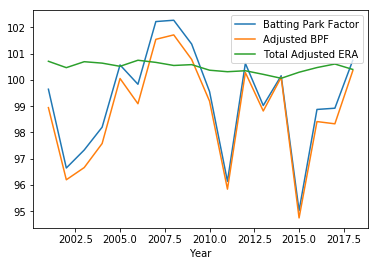

In [6]:
plotframe=yearframe.loc[yearframe.index>2000] 
plotframe[["Batting Park Factor","Adjusted BPF","Total Adjusted ERA"]].plot()

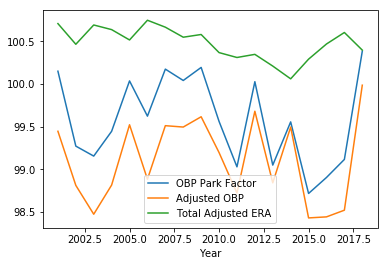

In [7]:
plotframe=yearframe.loc[yearframe.index>2000] 
plotframe[["OBP Park Factor","Adjusted OBP","Total Adjusted ERA"]].plot()